# <center> Predicting a Biological Response
<center> <img src="https://www.cancerquest.org/sites/default/files/2021-04%20more/Biological_Approach_Sq.gif" width="300" height="300">

The project is based on the [Kaggle: Predicting a Biological Response](https://www.kaggle.com/c/bioresponse) Competition

The objective of the competition is to help us build as good a model as possible so that we can, as optimally as this data allows, relate molecular information, to an actual biological response.

Each line represents a molecula. 

The first column (Activity) describes the experiment data - the biological response [0, 1];

The rest of the columns (D1 through D1776) represent molecular descriptors these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution.

______________________________________________________

We will build the ML model using both the Logistic Regression and Random Forest methods.

We will also optimise the hyperparametors for these methods using four different techniques:
- GridSeachCV,
- RandomizedSearchCV,
- Hyperopt,
- Optuna

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('seaborn')

## Data Loading

In [2]:
data = pd.read_csv('/home/mike/Documents/Coding/Data/ML - Predicting a Biological Response/_train_sem09.csv')

data.head(3)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.isnull().sum()

Activity    0
D1          0
D2          0
D3          0
D4          0
           ..
D1772       0
D1773       0
D1774       0
D1775       0
D1776       0
Length: 1777, dtype: int64

Check if the data is well-balanced

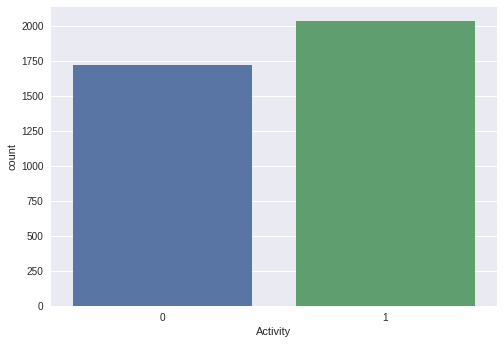

In [4]:
sns.countplot(data=data, x='Activity');

Creating an observation matrix $X$ and a vector of answers $y$

In [7]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

Split the dataset into a train and test sets 80/20. Use stratify split to maintain the distribution of the target parameter.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.2)

## Optimise the hyperparameters

## Logistic Regression

Set the banchmark using by-default parameters of LogisticRegression()

In [11]:
#Create the logistic-regression class object
log_reg = linear_model.LogisticRegression(max_iter = 50)
#Train the model by minimizing logloss
log_reg.fit(X_train, y_train)
print("The test set accuracy is {:.2f}".format(log_reg.score(X_test, y_test)))
y_test_pred = log_reg.predict(X_test)
print('f1_score for the test set is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

The test set accuracy is 0.75
f1_score for the test set is 0.78


/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <center> **GridSearchCV**

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l2', 'none'], #penalty type
              'solver': ['lbfgs', 'saga'], # optimisation algorithm
              }

grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=42,
        max_iter=50 #the number of iterations is so low for training purposes
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)

# Calculate the metrics
grid_search.fit(X_train, y_train)
print("The test set accuracy after GridSearchCV parameter optimisation is {:.2f}".format(grid_search.score(X_test, y_test)))
y_test_pred = grid_search.predict(X_test)
print('f1_score for the test set after GridSearchCV parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("The best hyperparameters according to GridSearchCV are {}".format(grid_search.best_params_))

/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

The test set accuracy after GridSearchCV parameter optimisation is 0.76
f1_score for the test set after GridSearchCV parameter optimisation is 0.78
The best hyperparameters according to GridSearchCV are {'penalty': 'l2', 'solver': 'saga'}


/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### <center> **RandomizedSearchCV**

In [29]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'penalty': ['l2', 'none'] ,
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))}
            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(random_state=42, max_iter=50), 
    param_distributions=param_grid, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)

# Calculate the metrics
random_search.fit(X_train, y_train) 
print("The test set accuracy after RandomizedSearchCV parameter optimisation is {:.2f}".format(random_search.score(X_test, y_test)))
y_test_pred = random_search.predict(X_test)
print('f1_score for the test set after RandomizedSearchCV parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("The best hyperparameters according to RandomizedSearchCV are {}".format(random_search.best_params_))

/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

The test set accuracy after RandomizedSearchCV parameter optimisation is 0.75
f1_score for the test set after RandomizedSearchCV parameter optimisation is 0.78
The best hyperparameters according to RandomizedSearchCV are {'solver': 'sag', 'penalty': 'l2', 'C': 0.01}


/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### <center> **Hyperopt**

In [31]:
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials

In [33]:
trials = Trials() # for results logging

space={'n_estimators': hp.quniform('n_estimators', 100, 300, 10),
       'max_depth' : hp.quniform('max_depth', 15, 40, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 7, 1)
      }

def hyperopt_gb(params, cv=5, X=X_train, y=y_train, random_state=42):
    # the function receives the hyperparameters combination through "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'min_samples_leaf': int(params['min_samples_leaf'])
              }
    # use this combination to build the model
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)
 
    # Train the model
    model.fit(X, y)
    score = metrics.f1_score(y, model.predict(X))
    # The metrics should be minimised, therefore we add '-' at the beginning
    return -score
 
    # Begin selection of hyperparameters
best=fmin(hyperopt_gb, # the function
          space=space, # the space of hyperparameters
          algo=tpe.suggest, # optimisation algorythm (by default)
          max_evals=20, # max number of iterations
          trials=trials, # result logging
          rstate=np.random.default_rng(42)
         )
 
# Calculate the metrics
model = ensemble.RandomForestClassifier(random_state=42, 
                                        n_estimators=int(best['n_estimators']),   
                                        max_depth=int(best['max_depth']),
                                        min_samples_leaf=int(best['min_samples_leaf']))
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1_score for the test set after Hyperopt parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

100%|██████████| 20/20 [00:54<00:00,  2.73s/trial, best loss: -0.9743433109346366]
f1_score for the test set after Hyperopt parameter optimisation is 0.79


## <center> Optuna

In [34]:
import optuna

In [35]:
# set the hyperparameters search space
space={'n_estimators': hp.quniform('n_estimators', 100, 300, 10),
       'max_depth' : hp.quniform('max_depth', 15, 40, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 7, 1)
      }

def optuna_rf(trial):
  # set the hyperparameters search space
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  # build the model
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # train the model
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))
  return score

# create the research object
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# searching the best hyperparameters combination 'n_trials' times
study.optimize(optuna_rf, n_trials=20)

# Calculate the metrics
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1_score for the test set after Optuna parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2022-06-14 00:29:34,777] A new study created in memory with name: RandomForestClassifier
[I 2022-06-14 00:29:36,542] Trial 0 finished with value: 0.9895769466584917 and parameters: {'n_estimators': 101, 'max_depth': 23, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9895769466584917.
[I 2022-06-14 00:29:38,613] Trial 1 finished with value: 0.94092439546985 and parameters: {'n_estimators': 143, 'max_depth': 17, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9895769466584917.
[I 2022-06-14 00:29:41,199] Trial 2 finished with value: 0.9438339438339438 and parameters: {'n_estimators': 185, 'max_depth': 18, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9895769466584917.
[I 2022-06-14 00:29:42,681] Trial 3 finished with value: 0.9334144116752812 and parameters: {'n_estimators': 102, 'max_depth': 14, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9895769466584917.
[I 2022-06-14 00:29:46,013] Trial 4 finished with value: 0.9917101627264354 and parameters: {'n_es

f1_score for the test set after Optuna parameter optimisation is 0.80


## Random Forest

Set the banchmark using by-default parameters of RandomForestClassifier()

In [38]:
#Create the Random Forest class object
rf = ensemble.RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Calculate the metrics 
y_test_pred = rf.predict(X_test)
print('f1_score for the test set (Random Forest, default parameters) is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score for the test set (Random Forest, default parameters) is 0.80


## <center> GridSearchCV 

In [39]:
# Set up the hyperparameters grid
param_grid = {'n_estimators': list(range(80, 200, 30)), # the number of trees in the forest
              'min_samples_leaf': [5], # the minimum number of samples required to be at a leaf node
              'max_depth': list(np.linspace(20, 40, 5, dtype=int)) # the maximum depth of the tree
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  

# Calculate the metrics 
grid_search_forest.fit(X_train, y_train) 
y_test_pred = grid_search_forest.predict(X_test)
print('f1_score for the test set after GridSearchCV parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("The best Random Forest hyperparameters according to GridSearchCV are {}".format(grid_search_forest.best_params_))

f1_score for the test set after GridSearchCV parameter optimisation is 0.80
The best Random Forest hyperparameters according to GridSearchCV are {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 140}


## <center> RandomizedSearchCV 

In [40]:
param_grid = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions=param_grid, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)  

# Calculate the metrics 
random_search_forest.fit(X_train, y_train) 
y_test_pred = random_search_forest.predict(X_test)
print('f1_score for the test set after RandomizedSearchCV parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("The best Random Forest hyperparameters according to RandomizedSearchCV are {}".format(random_search_forest.best_params_))

f1_score for the test set after RandomizedSearchCV parameter optimisation is 0.80
The best Random Forest hyperparameters according to RandomizedSearchCV are {'n_estimators': 170, 'min_samples_leaf': 5, 'max_depth': 22}


### <center> Hyperopt

In [41]:
# Set up the hyperparameters search space
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 15, 26, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 10, 1)
      }

In [52]:
# create a function to minimize the metric,
# the function receives a dictionary of hyperparameter values and returns the value of the target function
def hyperopt_gb(params, cv=5, X=X_train, y=y_train, random_state=42):
    # the function receives a combination of hyperparameter in "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'min_samples_leaf': int(params['min_samples_leaf'])
              }
    # use this combination to build the model
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)
 
    # train the model
    model.fit(X, y)
    score = metrics.f1_score(y, model.predict(X))
    
    # the metrics should be minimised, therefore we add '-' at the beginning
    return -score
 
trials = Trials() # for result logging
 
# begin the selection of hyperparameters
best=fmin(hyperopt_gb, # the function 
          space=space, # the space of hyperparameters
          algo=tpe.suggest, # optimisation algorythm (by default)
          max_evals=20, # max number of iterations
          trials=trials, # result logging
          rstate=np.random.default_rng(42)
         )
 
# calculate the metrics
model = ensemble.RandomForestClassifier(random_state=42, 
                                        n_estimators=int(best['n_estimators']),   
                                        max_depth=int(best['max_depth']),
                                        min_samples_leaf=int(best['min_samples_leaf']))
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1_score for the test set after Hyperopt parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

100%|██████████| 20/20 [00:40<00:00,  2.01s/trial, best loss: -0.9868380777471687]
f1_score for the test set after Hyperopt parameter optimisation is 0.81


## <center> Optuna

In [50]:
def optuna_rf(trial):
    # Set up the hyperparameters search space
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
    
    # build the model
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=42)
    
    # train the model
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train))
    return score

# create the study object
# maximising the metric using direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# search for the best hyperparameters combination n_trials times
study.optimize(optuna_rf, n_trials=20)

# Calculate the metrics
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1_score for the test set after Optuna parameter optimisation is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2022-06-14 23:19:17,748] A new study created in memory with name: RandomForestClassifier
[I 2022-06-14 23:19:19,805] Trial 0 finished with value: 0.89592209373098 and parameters: {'n_estimators': 170, 'max_depth': 29, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.89592209373098.
[I 2022-06-14 23:19:22,370] Trial 1 finished with value: 0.9746719560573696 and parameters: {'n_estimators': 166, 'max_depth': 30, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9746719560573696.
[I 2022-06-14 23:19:23,748] Trial 2 finished with value: 0.8899755501222495 and parameters: {'n_estimators': 120, 'max_depth': 10, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.9746719560573696.
[I 2022-06-14 23:19:25,778] Trial 3 finished with value: 0.9500912964090079 and parameters: {'n_estimators': 138, 'max_depth': 16, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9746719560573696.
[I 2022-06-14 23:19:27,952] Trial 4 finished with value: 0.9643835616438357 and parameters: {'n_est

f1_score for the test set after Optuna parameter optimisation is 0.81


## Conclusion

### LogisticRegression
* f1_score for the test set (default parameters) is <b>0.78</b>
* GridSearchCV parameter optimisation - f1_score is <b>0.78</b> - the metric is not improved
* RandomizedSearchCV parameter optimisation - f1_score is <b>0.78</b> - the metric is not improved
* Hyperopt parameter optimisation - f1_score is <b>0.79</b> - the metric is improved
* Optuna parameter optimisation - f1_score is <b>0.80</b> - the metric is improved


### RandomForestClassifier
* f1_score for the test set (default parameters) is <b>0.80</b>
* GridSearchCV parameter optimisation - f1_score is <b>0.80</b> - the metric is not improved
* RandomizedSearchCV parameter optimisation - f1_score is <b>0.80</b> - the metric is not improved
* Hyperopt parameter optimisation - f1_score is <b>0.81</b> - the metric is improved
* Optuna parameter optimisation - f1_score is <b>0.81</b> - the metric is improved